In [216]:
#Primeiro passo é a importação da biblioteca e dos dados
import pandas as pd
import numpy  as np
import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 

df_suicídio = pd.read_csv('C:/Users/Dell/Desktop/suicidios_2010_a_2019.csv' , sep = ',' , encoding= 'utf-8')

df_suicídio.head(5)

C:\Users\Dell\AppData\Local\Temp\ipykernel_24308\3766267227.py:9: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_suicídio = pd.read_csv('C:/Users/Dell/Desktop/suicidios_2010_a_2019.csv' , sep = ',' , encoding= 'utf-8')


,Unnamed: 0,estado,ano,mes,DTOBITO,DTNASC,SEXO,RACACOR,ASSISTMED,ESCMAE,ESTCIV,ESC,OCUP,CODMUNRES,CAUSABAS,CAUSABAS_O,LOCOCOR,CIRURGIA
0,1,AC,2010,1,2010-01-31,1999-11-09,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Via pública,Não
1,2,AC,2010,2,2010-02-07,1985-09-23,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,Não
2,3,AC,2010,2,2010-02-19,1995-08-06,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,Não
3,4,AC,2010,4,2010-04-20,1983-12-25,Feminino,Parda,NaN,NaN,Casado/a,1 a 3 anos,DONA DE CASA,Tarauacá,X780,X780,Domicílio,Não
4,5,AC,2010,7,2010-07-24,1982-05-13,Masculino,Parda,NaN,NaN,Casado/a,NaN,DONA DE CASA,Tarauacá,X720,X720,Domicílio,Não


In [218]:
#Vamos verificar quantas linhas e colunas tem nosso dataset
linhas, colunas = df_suicídio.shape

print(f'o dataset contém {linhas} linhas , e {colunas} colunas' )

o dataset contém 112491 linhas , e 18 colunas


In [220]:
#Agora vamos ver a quantidade de colunas e o tipo de cada uma delas, vemos que o 
df_suicídio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112491 entries, 0 to 112490
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  112491 non-null  int64 
 1   estado      112491 non-null  object
 2   ano         112491 non-null  int64 
 3   mes         112491 non-null  int64 
 4   DTOBITO     112491 non-null  object
 5   DTNASC      101633 non-null  object
 6   SEXO        112469 non-null  object
 7   RACACOR     109320 non-null  object
 8   ASSISTMED   70687 non-null   object
 9   ESCMAE      15 non-null      object
 10  ESTCIV      103791 non-null  object
 11  ESC         84327 non-null   object
 12  OCUP        60274 non-null   object
 13  CODMUNRES   112491 non-null  object
 14  CAUSABAS    112491 non-null  object
 15  CAUSABAS_O  112204 non-null  object
 16  LOCOCOR     112031 non-null  object
 17  CIRURGIA    8549 non-null    object
dtypes: int64(3), object(15)
memory usage: 15.4+ MB


In [222]:
#Vemos que as variaveis DTOBITO e DTNASC não estão no formato correto que é data então vamos realizar a formatação
df_suicídio['DTOBITO'] = pd.to_datetime(df_suicídio['DTOBITO'] , format = '%Y-%m-%d',errors = 'coerce')
df_suicídio['DTNASC'] = pd.to_datetime(df_suicídio['DTNASC'] , format = '%Y-%m-%d', errors = 'coerce')

In [224]:
#Agora para melhorar a leitura mudaremos a data para o formato DD/MM/YYYY

df_suicídio['DTOBITO'] = df_suicídio['DTOBITO'].dt.strftime('%d-%m-%Y')
df_suicídio['DTNASC'] = df_suicídio['DTNASC'].dt.strftime('%d-%m-%Y')

In [226]:
#Verificando se as atualizações surtiram efeito
df_suicídio.head(20)

,Unnamed: 0,estado,ano,mes,DTOBITO,DTNASC,SEXO,RACACOR,ASSISTMED,ESCMAE,ESTCIV,ESC,OCUP,CODMUNRES,CAUSABAS,CAUSABAS_O,LOCOCOR,CIRURGIA
0,1,AC,2010,1,31-01-2010,09-11-1999,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Via pública,Não
1,2,AC,2010,2,07-02-2010,23-09-1985,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,Não
2,3,AC,2010,2,19-02-2010,06-08-1995,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,Não
3,4,AC,2010,4,20-04-2010,25-12-1983,Feminino,Parda,NaN,NaN,Casado/a,1 a 3 anos,DONA DE CASA,Tarauacá,X780,X780,Domicílio,Não
4,5,AC,2010,7,24-07-2010,13-05-1982,Masculino,Parda,NaN,NaN,Casado/a,NaN,DONA DE CASA,Tarauacá,X720,X720,Domicílio,Não
5,6,AC,2010,4,30-04-2010,13-07-1967,Feminino,Preta,NaN,NaN,Solteiro/a,4 a 7 anos,DONA DE CASA,Tarauacá,X780,X780,Hospital,Não
6,7,AC,2010,1,15-01-2010,05-09-1979,Masculino,Parda,NaN,NaN,Solteiro/a,4 a 7 anos,NaN,Rio Branco,X700,X700,Domicílio,Não
7,8,AC,2010,1,16-01-2010,19-01-1994,Masculino,Parda,NaN,NaN,Solteiro/a,NaN,NaN,Rio Branco,X700,X700,Domicílio,Não
8,9,AC,2010,9,15-09-2010,14-04-1952,Masculino,Parda,NaN,NaN,Solteiro/a,NaN,NaN,Rio Branco,X629,R99,Domicílio,NaN
9,10,AC,2010,9,03-09-2010,14-08-1968,Masculino,Parda,NaN,NaN,Solteiro/a,NaN,NaN,Epitaciolândia,X747,X747,Domicílio,Não


In [228]:
#Vemos que no começo do nosso conjunto de dados tem uma coluna Unnamed: 0 que esta enumerando as ocorrencias, como não precisamos dela vamos retirar ela
#Do nosso dataset
df_suicídio = df_suicídio.drop('Unnamed: 0', axis = 1)

In [230]:
#Podemos notar que aparentemente as informações CAUSABAS e CAUSABAS_O são iguais, vamos verificar se realmente são iguais e se forem deletaremos uma
if df_suicídio['CAUSABAS'].equals(df_suicídio['CAUSABAS_O']):
    print('são iguais')
else:
    print('são diferentes')

são diferentes


Vemos que as duas variaveis são diferentes, consultando no metadados das informações vemos que a coluna CAUSABAS_O representa a primeira informação que entra nos sistema, já a coluna CAUSABAS representa a causa básica, conforme a Classificação Internacional de Doença (CID) após a revisão. Com essas informações em mãos vamos manter somente a coluna CAUSABAS

In [232]:
df_suicídio = df_suicídio.drop('CAUSABAS_O',axis = 1)

In [234]:
#Próximo passo agora é filtrar os casos que são somente suicídio, para isso vamos pegar no site da OMS os CIDs referentes a suicídio e após isso filtrar
#No Dataframe
df_fil_sui = df_suicídio[df_suicídio['CAUSABAS'].str.startswith(('X6', 'X7', 'X8', 'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39'))]

In [236]:
#Vamos verificar se foi filtrado os CIDs corretos 
df_fil_sui['CAUSABAS'].unique()

array(['X780', 'X720', 'X700', 'X629', 'X747', 'X699', 'X709', 'X740',
       'X749', 'X689', 'X609', 'X702', 'X800', 'X718', 'X750', 'X649',
       'X640', 'X804', 'X719', 'X769', 'X704', 'X809', 'X680', 'X698',
       'X729', 'X728', 'X690', 'X844', 'X730', 'X748', 'X708', 'X701',
       'X739', 'X705', 'X742', 'X744', 'X814', 'X789', 'X849', 'X682',
       'X785', 'X734', 'X642', 'X688', 'X799', 'X692', 'X697', 'X619',
       'X829', 'X824', 'X710', 'X707', 'X787', 'X652', 'X805', 'X669',
       'X717', 'X834', 'X760', 'X703', 'X840', 'X802', 'X839', 'X696',
       'X618', 'X761', 'X639', 'X801', 'X681', 'X610', 'X836', 'X745',
       'X659', 'X684', 'X644', 'X685', 'X746', 'X612', 'X632', 'X830',
       'X650', 'X808', 'X722', 'X828', 'X630', 'X725', 'X791', 'X784',
       'X620', 'X794', 'X687', 'X727', 'X764', 'X706', 'X806', 'X686',
       'X788', 'X738', 'X798', 'X724', 'X694', 'X678', 'X654', 'X735',
       'X648', 'X623', 'X848', 'X845', 'X741', 'X611', 'X842', 'X691',
      

In [238]:
#Após filtrado vamos agora remover as colunas que não precisamos para as nossas inferências
df_fil_sui = df_fil_sui.drop(['ESCMAE','CIRURGIA','ASSISTMED'], axis = 1)

In [72]:
#Após filtrarmos e retirada as colunas que não vamos mais usar, chegou a hora de verificar a quantidade de valores nulos por coluna
df_fil_sui.isnull().sum()

estado           0
ano              0
mes              0
DTOBITO          0
DTNASC       11705
SEXO            22
RACACOR       3166
ESTCIV        8656
ESC          28077
OCUP         52067
CODMUNRES        0
CAUSABAS         0
LOCOCOR        459
dtype: int64

In [240]:
#Como a DTNASC é uma importante métrica para nossas análises iremos remover os valores Nulos, as demais colunas iremos substituir os valores nulos por
#desconhecidos, também iremos remos os nulos da coluna SEXO, as demais colunas vamos substituir os valores nulos por desconhecidos
df_fil_sui.dropna(subset=['DTNASC'], inplace = True)
df_fil_sui.dropna(subset=['SEXO'], inplace = True)
df_fil_sui['RACACOR'].fillna('Desconhecido',inplace = True)
df_fil_sui['ESTCIV'].fillna('Desconhecido',inplace = True)
df_fil_sui['ESC'].fillna('Desconhecido',inplace = True)
df_fil_sui['OCUP'].fillna('Desconhecido',inplace = True)
df_fil_sui['LOCOCOR'].fillna('Desconhecido',inplace = True)





C:\Users\Dell\AppData\Local\Temp\ipykernel_24308\2870362461.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fil_sui['RACACOR'].fillna('Desconhecido',inplace = True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_24308\2870362461.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [180]:
df_fil_sui.isnull().sum()

estado       0
ano          0
mes          0
DTOBITO      0
DTNASC       0
SEXO         0
RACACOR      0
ESTCIV       0
ESC          0
OCUP         0
CODMUNRES    0
CAUSABAS     0
LOCOCOR      0
dtype: int64

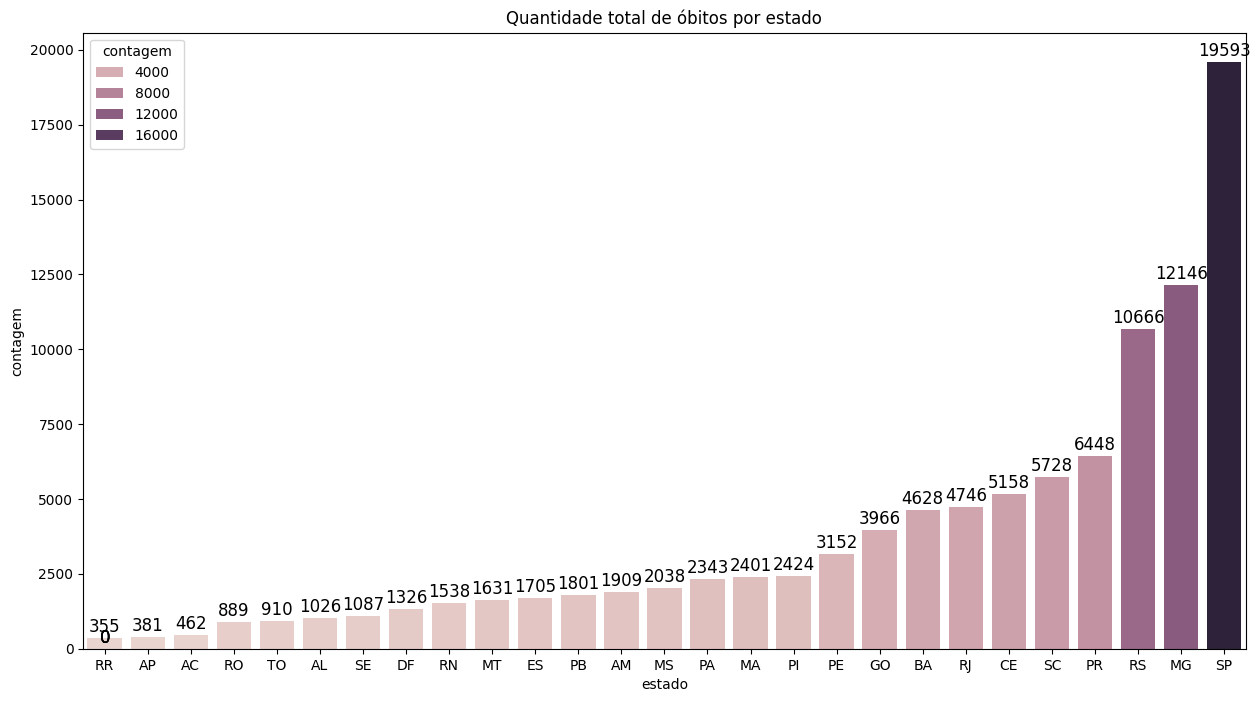

In [242]:
#Após o tratamento dos dados chegou a hora de fazermos algumas inferencias nos nossos dados
#Ver a quantidade total de óbitos por estado
df_agrupado = df_fil_sui.groupby(['estado']).size().reset_index(name = 'contagem')
df_agrupado_sorted = df_agrupado.sort_values(by='contagem', ascending=True)
plt.figure(figsize=(15, 8))
plt.title('Quantidade total de óbitos por estado')
ax = sns.barplot( x = 'estado' , hue = 'contagem' , y = 'contagem', data=df_agrupado_sorted)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='center',  
                fontsize=12, color='black',  
                xytext=(0, 8),  
                textcoords='offset points')
plt.show()

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

# Média de quantidade de suicídios por ano e por estado
df_contagem = df_fil_sui.groupby(['estado', 'ano']).size().reset_index(name='contagem')
media_ano_estado = df_contagem.groupby(['estado','ano'])['contagem'].mean().reset_index()
media_ano_estado 

,estado,ano,contagem
0,AC,2010,40.0
1,AC,2011,33.0
2,AC,2012,38.0
3,AC,2013,40.0
4,AC,2014,44.0
...,...,...,...
265,TO,2015,89.0
266,TO,2016,96.0
267,TO,2017,96.0
268,TO,2018,114.0


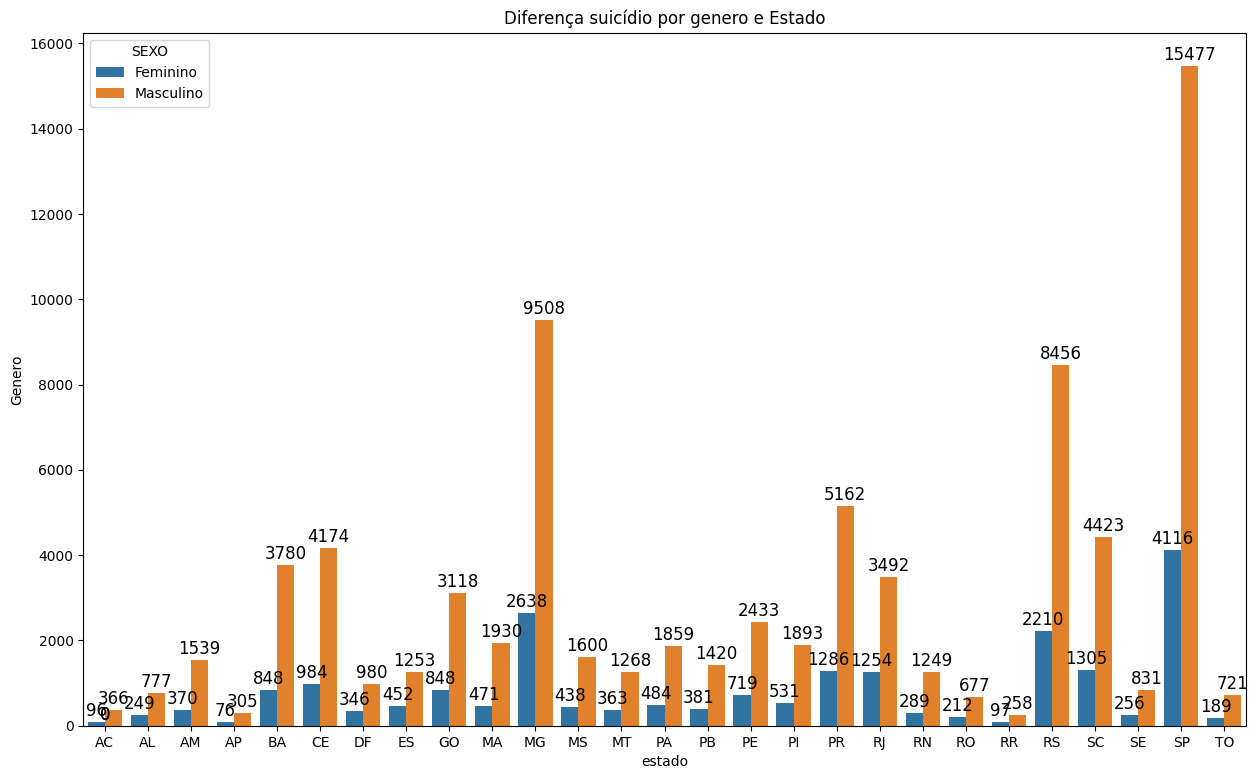

In [575]:
#Verificar quantidade de suicídio por genero
df_genero = df_fil_sui.groupby(['estado','SEXO'])['SEXO'].count().reset_index(name = 'Genero')
plt.figure(figsize=(15,9))
ax = sns.barplot( x = 'estado' , y = 'Genero' , hue = 'SEXO' , data = df_genero)
plt.title('Diferença suicídio por genero e Estado')
for p in ax.patches:
     ax.annotate(f'{p.get_height():.0f}',  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='center',  
                fontsize=12, color='black',  
                xytext=(0, 8),  
                textcoords='offset points')
plt.show()
    

In [244]:
#Agora vamos analisar se ouve aumento de suicidio 
from sklearn.linear_model import LinearRegression
# Preparar estrutura para armazenar resultados
resultados_tendencia = []

# Loop pelos estados
for estado in df_contagem['estado'].unique():
    estado_df = df_contagem[df_contagem['estado'] == estado]
    
    # Preparar os dados
    anos = estado_df['ano'].values.reshape(-1, 1)
    suicidios = estado_df['contagem'].values

    # Modelo de regressão
    modelo = LinearRegression()
    modelo.fit(anos, suicidios)
    
    # Armazenar resultado
    inclinacao = modelo.coef_[0]
    resultados_tendencia.append({'estado': estado, 'tendencia': inclinacao})

# Criar DataFrame para visualização
df_tendencias = pd.DataFrame(resultados_tendencia)

# Visualizar estados com tendências mais altas ou baixas
print(df_tendencias.sort_values(by='tendencia'))


   estado  tendencia
24     SE   0.369697
21     RR   1.921212
3      AP   3.109091
0      AC   3.127273
1      AL   3.454545
26     TO   4.533333
19     RN   4.872727
2      AM   6.006061
20     RO   6.539394
6      DF   7.078788
11     MS   7.600000
12     MT   7.666667
7      ES   8.515152
14     PB   9.775758
16     PI  13.006061
9      MA  14.260606
13     PA  15.048485
5      CE  15.345455
15     PE  17.006061
18     RJ  18.872727
4      BA  20.315152
8      GO  22.000000
23     SC  28.278788
22     RS  31.357576
25     SP  34.200000
17     PR  36.618182
10     MG  50.436364


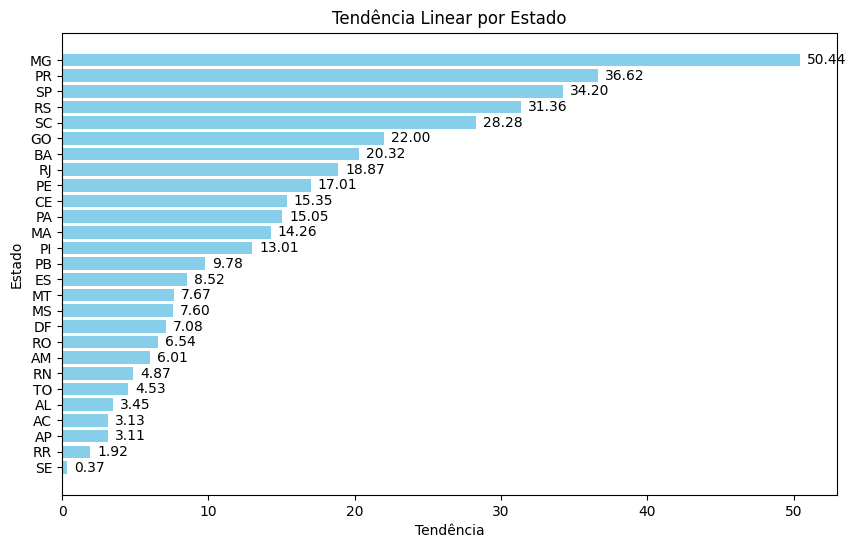

In [246]:
#Vamos agora plotar um gráfico com essas informações
df_tendencias = df_tendencias.sort_values(by='tendencia', ascending=True)  

# Criar gráfico de barras horizontais
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(df_tendencias['estado'], df_tendencias['tendencia'], color='skyblue')

# Adicionar anotações
for bar in bars:
    ax.annotate(f'{bar.get_width():.2f}',  
                (bar.get_width(), bar.get_y() + bar.get_height() / 2),  
                ha='left', va='center', 
                fontsize=10, color='black', 
                xytext=(5, 0),  
                textcoords='offset points')

# Configurar o gráfico
ax.set_xlabel('Tendência')
ax.set_ylabel('Estado')
ax.set_title('Tendência Linear por Estado')
plt.show()

<h4>Como a inclinação de todos os estados foi positiva, significa que o número de suicídios está aumentando ao longo do tempo.</h4>
<h4>Um ponto de atenção é o estado de Minas Gerais (MG), que está apresentando um aumento de 50 suicídios por ano, uma taxa bastante alta</h4>

In [328]:
#Vamos agora calcular a idade de cada pessoa no momento do óbito, para continuar nossos estudos vendo agora qual a faixa etaria mais afetada 
dt2 = df_fil_sui.copy()
dt2['IDADE'] = (dt2['DTOBITO'] - dt2['DTNASC']).dt.days // 365
dt2

,estado,ano,mes,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,CAUSABAS,LOCOCOR,IDADE
0,AC,2010,1,2010-01-31,1999-11-09,Masculino,Parda,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,Via pública,10
1,AC,2010,2,2010-02-07,1985-09-23,Masculino,Parda,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,Hospital,24
2,AC,2010,2,2010-02-19,1995-08-06,Masculino,Parda,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,Hospital,14
3,AC,2010,4,2010-04-20,1983-12-25,Feminino,Parda,Casado/a,1 a 3 anos,DONA DE CASA,Tarauacá,X780,Domicílio,26
4,AC,2010,7,2010-07-24,1982-05-13,Masculino,Parda,Casado/a,Desconhecido,DONA DE CASA,Tarauacá,X720,Domicílio,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112486,TO,2019,9,2019-09-14,1991-08-10,Feminino,Parda,Solteiro/a,4 a 7 anos,COZINHEIRO GERAL,Colinas do Tocantins,X700,Outros,28
112487,TO,2019,9,2019-09-26,1967-02-17,Feminino,Parda,Solteiro/a,4 a 7 anos,DONA DE CASA,Santa fé do Araguaia,X700,Domicílio,52
112488,TO,2019,8,2019-08-07,1977-07-20,Masculino,Branca,Casado/a,8 a 11 anos,COPEIRO,Araguaína,X700,Domicílio,42
112489,TO,2019,10,2019-10-04,1978-05-03,Masculino,Parda,Casado/a,Desconhecido,Desconhecido,Divinópolis do Tocantins,X729,Hospital,41


<H3>Agora vamos separar o dataframe por conjunto de idades</H3>
<h5>0 - 12 anos: Crianças</h5>
<h5>13 - 18 anos: Adolescente</h5>
<h5>19 - 29 anos: Jovens Adultos</h5>
<h5>30 - 44 anos: Adultos (com foco na fase de estabelecimento profissional e familiar)</h5>
<h5>45 - 59 anos: Adultos de Meia-Idade</h5>
<h5>60+ anos: Idosos </h5:>


In [363]:
#Separando as faixas
faixas_etarias = ['Crianças', 'Adolescente', 'Jovens Adultos', 'Adultos', 'Adultos de Meia-Idade', 'Idosos']

# Usar pd.cut para segmentar as idades em faixas
dt2['faixa-etaria'] = pd.cut(dt2['IDADE'], 
                              bins=[0, 12, 18, 29, 44, 56, 100], 
                              labels=faixas_etarias, 
                              right=False)

C:\Users\Dell\AppData\Local\Temp\ipykernel_24308\1186441220.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dt2_agrupado = dt2.groupby(['estado','faixa-etaria']).size().reset_index(name = 'contagem')


Text(0, 0.5, 'Contagem')

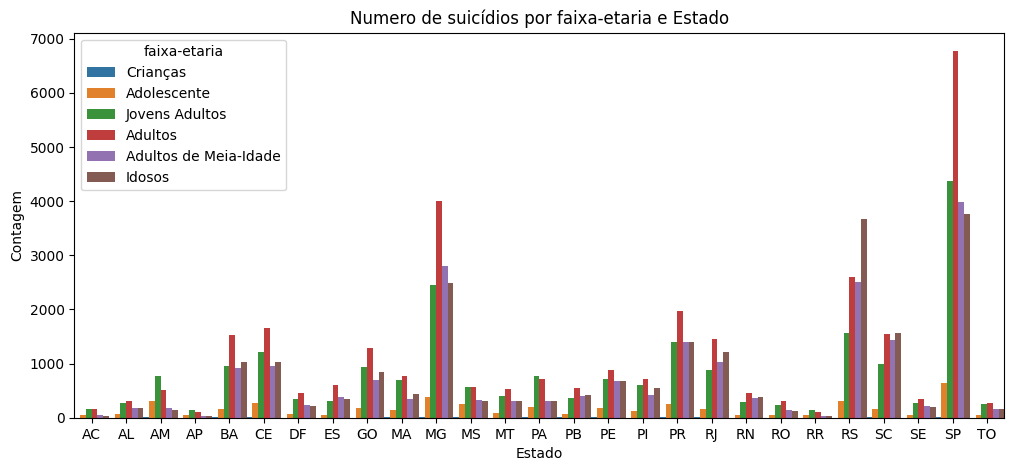

In [573]:
dt2_agrupado = dt2.groupby(['estado','faixa-etaria']).size().reset_index(name = 'contagem')
dt2_agrupado
plt.figure(figsize=(12,5))
ax = sns.barplot( x = 'estado' , y ='contagem' , hue = 'faixa-etaria' , data = dt2_agrupado, width = 1.0);
plt.title('Numero de suicídios por faixa-etaria e Estado')
plt.xlabel('Estado')
plt.ylabel('Contagem')

<h5>Com base nessas inferências, podemos concluir que a maior taxa de suicídios ocorre entre a população masculina, sendo predominantemente adulta.</h5>
<h5>E a maior taxa de suicídios ocorre no estado de SP</h5>

Text(0.5, 1.0, 'Número de Suicídios por Cor (Raça) e Estado')

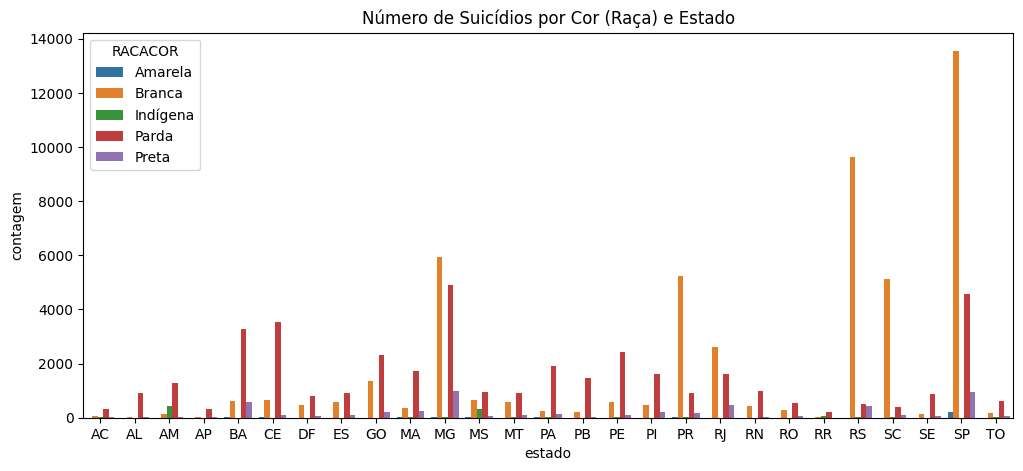

In [569]:
#Vamos agora entender a ocorrencia de suicidio por raça 
dt3 = dt3[dt3['RACACOR'] != 'Desconhecido']
dt3_agrupado = dt3.groupby(['estado','RACACOR']).size().reset_index(name = 'contagem')
plt.figure(figsize=(12,5))
sns.barplot( x= 'estado' , y = 'contagem' , hue = 'RACACOR' , data = dt3_agrupado)
plt.title('Número de Suicídios por Cor (Raça) e Estado')


<h5>Há uma correlação clara entre o número de suicídios e a população predominante em cada estado, já que a população Branca e Parda têm maior representatividade nos números.</h5>
<h5>baixa incidência entre as populações Indígena e Amarela pode refletir subnotificação ou efetivamente menos ocorrências nessa população.</h5>

Text(0.5, 1.0, 'Número de Suicídios por Escolaridade')

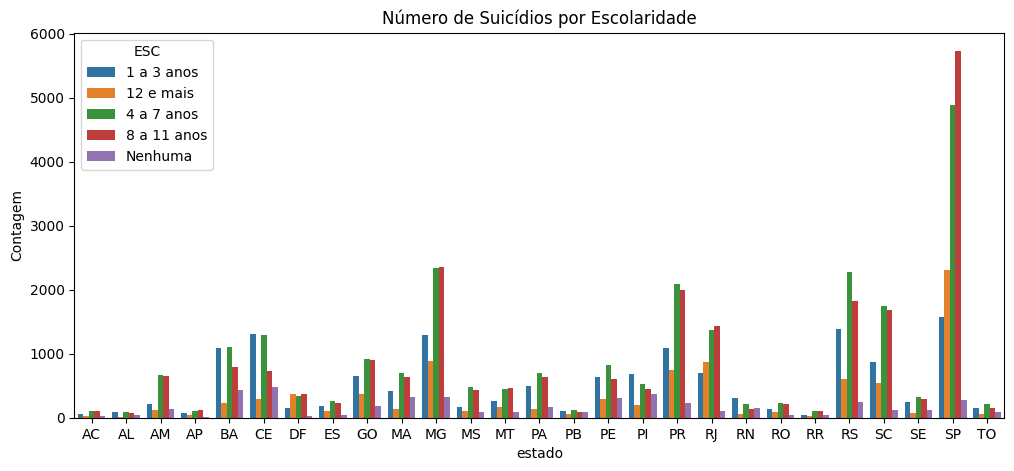

In [598]:
#A seguir, analisaremos se há alguma relação entre os anos de escolaridade e os casos de suicídio.
dt4 = df_fil_sui.copy()

#Filtrando o dataset para retirar os valores desconhecidos
dt4 = dt4[dt4['ESC'] != 'Desconhecido']

#Agrupando para contagem de suicídio por estado
dt4_agrupado = dt4.groupby(['estado','ESC']).size().reset_index(name = 'Contagem')
dt4_agrupado

#Plotando o grafico
plt.figure(figsize=(12,5))
sns.barplot(x='estado', y = 'Contagem' , hue = 'ESC' , data = dt4_agrupado)
plt.title('Número de Suicídios por Escolaridade')

<h5>Esse gráfico evidencia que, na maioria dos estados, os índices de suicídio são mais elevados entre indivíduos com escolaridade entre 4 a 7 anos.</h5>
<h5>Os indivíduos com 12 anos ou mais de escolaridade apresentam um número elevado de casos em diversos estados, como São Paulo, Minas Gerais e Paraná. Isso pode indicar que o fator educacional não necessariamente reduz os casos de suicídio.</h5>

<h4>Bom até aqui vemos que o dataset evidencia que o suicídio é um problema multifatorial, que atinge diferentes grupos populacionais, variando de acordo com gênero, raça/cor, escolaridade e localidade geográfica. Embora existam tendências identificáveis, como a maior incidência entre homens e pessoas com maior nível de escolaridade, essas variáveis não atuam isoladamente. Aqui estão os principais destaques:

Gênero:

A maior parte dos casos de suicídio ocorre entre homens. Isso pode estar relacionado a fatores culturais, sociais e psicológicos, como maior relutância em buscar ajuda ou diferenças no enfrentamento de problemas emocionais.

Raça/Cor:

As pessoas brancas e pardas concentram a maior parte dos registros de suicídio, mas há uma distribuição relevante em outros grupos raciais, como indígenas. Isso aponta para a necessidade de políticas públicas mais inclusivas e focadas em contextos específicos.

Escolaridade:

Indivíduos com 12 anos ou mais de escolaridade apresentam um número elevado de casos em vários estados, o que reflete que a educação, embora importante, não é suficiente para prevenir suicídios. Ao mesmo tempo, há registros em todas as faixas de escolaridade, incluindo pessoas sem instrução formal, reforçando o caráter universal desse problema.

Geografia:

Estados como São Paulo, Minas Gerais e Paraná se destacam com os maiores números absolutos de suicídios. Isso pode refletir tanto populações maiores quanto diferenças em fatores socioeconômicos, culturais ou acesso a serviços de saúde mental.

Fatores multifacetados:

As análises mostram que nenhuma variável isolada pode explicar os casos de suicídio. O problema parece ser resultado da interação de fatores sociais, econômicos, culturais e psicológicos, variando conforme o contexto local.

Conclusão geral:

O dataset reforça a complexidade do fenômeno do suicídio e destaca a necessidade de abordagens multidimensionais para enfrentá-lo. Políticas públicas devem considerar as especificidades de cada grupo (como gênero, raça e nível de escolaridade) e região, além de ampliar o acesso a serviços de saúde mental e promover campanhas de conscientização e prevenção.</h4>